# NOTEBOOK 2 LED toggle
---
This notebook contains 2 assignments

## LED toggle introduction

In this exercise you will switch a LED on and off with a single button press (so called Toggle function). In the 2nd assignment you will deal with the debouncing effect. 


A button is a small switch which is part of your kit. Wire a LED to `D13` and a button om `D5`. How to connect a button: see Introduction notebook.
Start with this example program (from https://learn.adafruit.com/circuitpython-essentials/circuitpython-digital-in-out) In this program a LED is switched on and off with a push button.


First the needed libraries are imported, including attributes for the digital in and out pins

In [ ]:
"""CircuitPython Essentials Digital In Out example"""
import time
import board
import digitalio

The LED is setup as an output

In [ ]:
# LED setup.
led = digitalio.DigitalInOut(board.D13)
led.direction = digitalio.Direction.OUTPUT


The button press is setup as a digital input. To avoid floating voltages (See xx) a pull up resistor is needed. However the Feather board is equipped with an internal pull up resistor, which has to be activated with `switch.pull`

In [ ]:
# button setup
switch = DigitalInOut(board.D5) 
switch.direction = digitalio.Direction.INPUT
switch.pull = digitalio.Pull.UP


the read of the switch is a `True` or `False` and with this value the led is switched on or off:

In [ ]:
while True:
    if switch.value:
        led.value = False
    else:
        led.value = True

    time.sleep(0.01)

## Schematic overview of a LED Toggle
In the assignment you will build a LED toggle function. In this function you switch the LED on and off with a single button press. One way to describe the functionality is to use (Digital) Timing Diagrams. From https://en.wikipedia.org/wiki/Digital_timing_diagram A digital timing diagram represents a set of signals in the time domain.

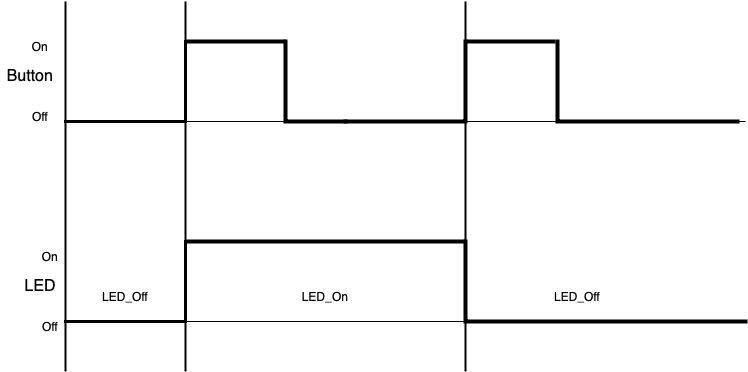

In this diagram the effect of a button press (top row) determines the LED state (on or off, button row) is shown visually. So, the output can be in 2 different states: `LedOff` and `LedOn`. Changes of this state is initiated by a button press. You see that the LED is switched on (or off) after a CHANGE of the button value. How can you detect the change of a button state in your code?

---
## Assignment 1

Setup a program to toggle a LED. One button push to switch the LED on and another push will switch the LED off. Note that the use of the `time.sleep()` function is NOT allowed. Use the timing diagram to see when a to switch the LED on and off

In [ ]:
# =============== YOUR CODE GOES HERE =================

import board
from digitalio import DigitalInOut, Direction, Pull

led = DigitalInOut(board.D6)
led.direction = Direction.OUTPUT
led_state = False

switches = [DigitalInOut(pin) for pin in [board.D5, board.D13]]
for switch in switches:
    switch.direction = Direction.INPUT
    switch.pull = Pull.UP
    
while True:
    if not switches[1].value:
        led_state = True
        print("ON")
        
    if not switches[0].value:
        led_state = False
        print("OFF")
        
    led.value = led_state


## Bouncing
You may encounter the effect that a single button push switches on and off in (more or less) the same time. This is called the bouncing effect of the button. When you press a button down, it may not immediately make a complete connection. In fact, it may make contact on one side - then both - and then the other side - until it finally settles down. This making and breaking contact is called bouncing. It is not a manufacturing defect of the button - bouncing is implicit in most physical switches. The trick is to only declare an input change after signal has been stable for at least 20 ms. This is illustrated in this timing diagram. 

Some switches bounce more than others and with some `CircuitPython` code won't see the bounces whereas C++ code (e.g. with Arduino) would. Python's slower performance can actually do you a favor sometimes. But not always. And as the microcontrollers `CircuitPython` runs on get faster, bouncing will be more of a problem.

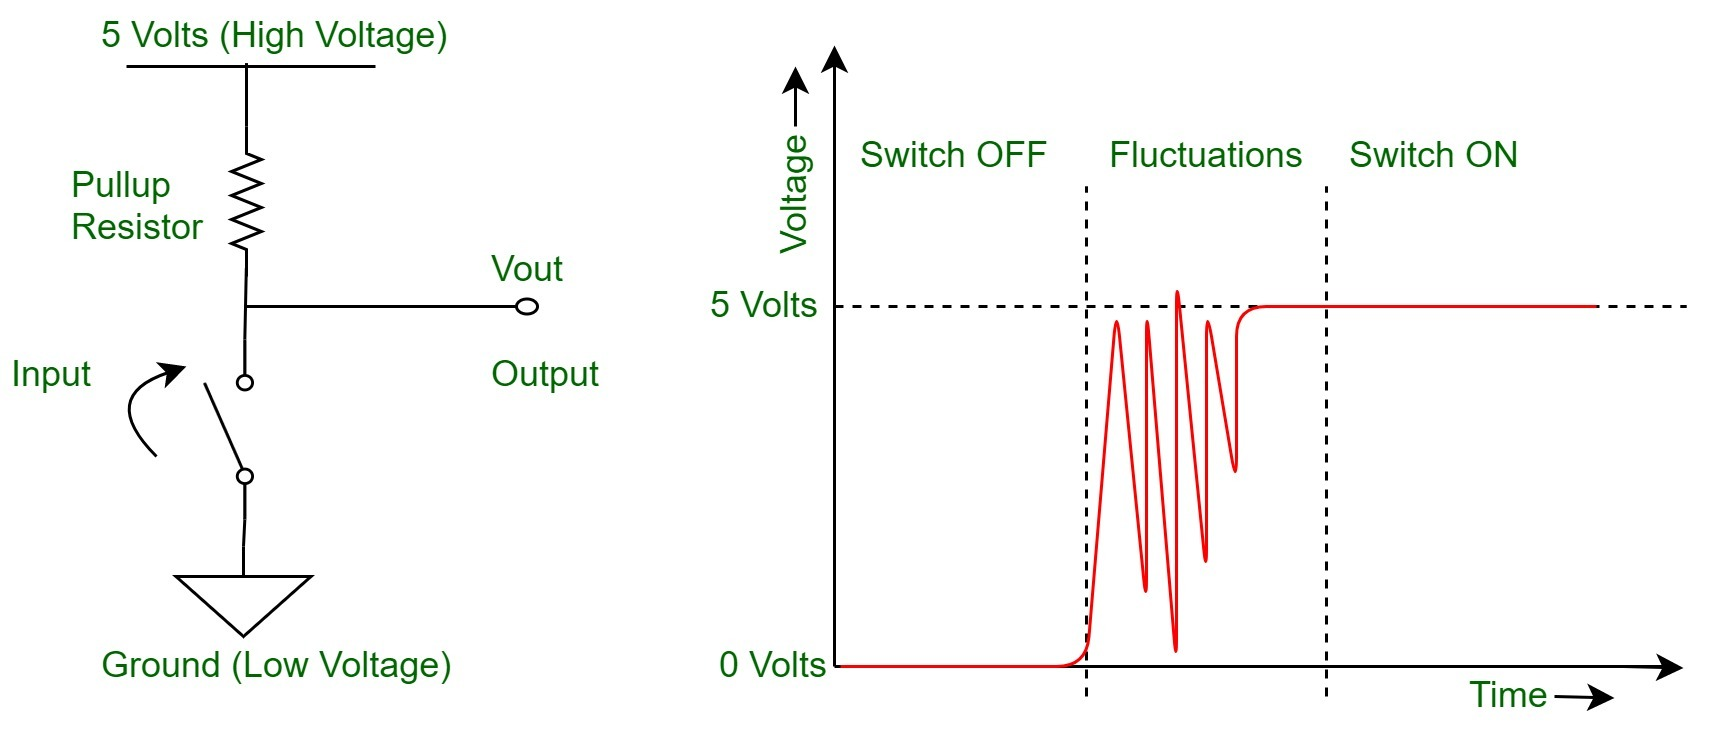

The solution to deal with bouncing is wait a certain time to "decide" that the button is switch on.

Because bouncing is a general issue, in `CircuitPython` a library is available. See https://learn.adafruit.com/debouncer-library-python-circuitpython-buttons-sensors/basic-debouncing. Detailed information including needed libraries are described here: https://docs.circuitpython.org/projects/debouncer/en/latest/. Something to keep in mind is that a debouncer will do nothing unless you call its `update()` method frequently and regularly. If your debouncer isn't working, check this first.


---
## Assignment 2

Extend the LED toggle program you made in Assignment 1 with the Debouncer functionality. Study references and example programs to find the correct usage.

In [ ]:
# =============== YOUR CODE GOES HERE =================
import board, time
from digitalio import DigitalInOut, Direction, Pull

led = DigitalInOut(board.D6)
led.direction = Direction.OUTPUT
led_state = False

switches = [DigitalInOut(pin) for pin in [board.D5, board.D13]]
for switch in switches:
    switch.direction = Direction.INPUT
    switch.pull = Pull.UP
    
while True:
    if not switches[1].value:
        led_state = True
        print("ON")
        
    if not switches[0].value:
        led_state = False
        print("OFF")
        
    led.value = led_state
    time.sleep(0.2)
